### 朴素贝叶斯分类
##有一个重要的假设,就是要提前假设特征分布情况

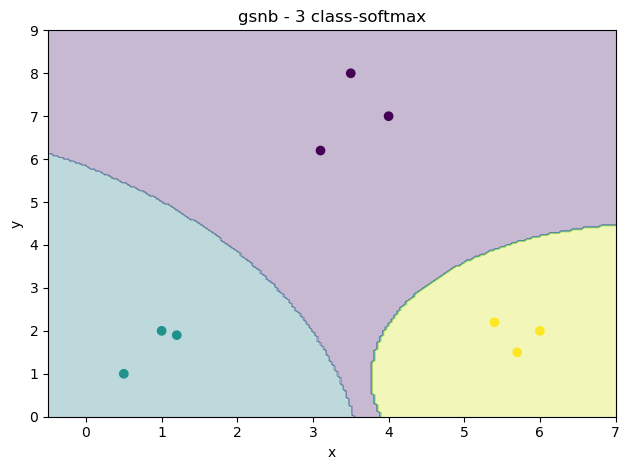

In [1]:
### 朴素贝叶斯分类--根据概率统计来分类
import sklearn.naive_bayes as snb
import numpy as np
import matplotlib.pyplot as plt

## 学校里60%男生, 40女生;
## 女生穿裤子人数和男生穿裤子人数一样
## 所有男生穿裤子
## 问:看到远处传裤子的一个学生,那么学生是女生的概率?
## P(A,B) = P(A|B)*P(B) = P(B|A)*P(A)
## P(女) = 0.4
## P(裤子|女) = 0.5
## P(裤子) = 0.6 + 0.2 = 0.8
## P(女|裤子) = P(女,裤子) / P(裤子) = P(裤子|女)*P(女) / P(裤子) = 0.5 * 0.4 / 0.8 = 0.25

##
# P(晴天,休闲,没约,高兴) VS P(晴天,休闲,没约,郁闷)
# P(晴天,休闲,没约,高兴)
# = P(晴天|休闲,没约,高兴) * P(休闲,没约,高兴)
# = P(晴天|休闲,没约,高兴) * P(休闲|没约,高兴) * P(没约,高兴)
# = P(晴天|休闲,没约,高兴) * P(休闲|没约,高兴) * P(没约|高兴) * P(高兴)
# = P(晴天|高兴) * P(休闲|高兴) * P(没约|高兴) * P(高兴)
# 因为晴天、休闲、没约 三个事件都和高兴相互独立
# 所以 P(晴天|休闲,没约,高兴) = P(晴天|高兴)

## 贝叶斯分类器
## 连续型
## snb.GaussianNB

x = np.array([
    [4, 7],
    [3.5, 8],
    [3.1, 6.2],
    [0.5, 1],
    [1, 2],
    [1.2, 1.9],
    [6, 2, ],
    [5.7, 1.5],
    [5.4, 2.2],
])

y = np.array([0, 0, 0, 1, 1, 1, 2, 2, 2])

model = snb.GaussianNB()
model.fit(x, y)

l, r = x[:, 0].min() -1, x[:, 0].max() + 1
b, t = x[:, 1].min() -1, x[:, 1].max() + 1
n = 200
xs, ys = np.meshgrid(np.linspace(l, r, n), np.linspace(b, t, n))
X = np.column_stack((xs.ravel(), ys.ravel()))
zs = model.predict(X)
zs = zs.reshape(xs.shape)
plt.figure()
plt.title('gsnb - 3 class-softmax')
plt.contourf(xs, ys, zs, alpha=0.3)
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()
plt.show()

## 离散型
# snb.MultinomialNB
## 二值型
# snb.BernoulliNB

朴素贝叶斯准确率: 0.7244444444444444
逻辑回归准确率: 0.7555555555555555

朴素贝叶斯概率总和（前 5 个样本）: [1. 1. 1. 1. 1.]
逻辑回归概率总和（前 5 个样本）: [1. 1. 1. 1. 1.]

朴素贝叶斯前 5 个样本的概率:
       不活跃概率    偶尔活跃概率    高度活跃概率
0  0.284512  0.678906  0.036581
1  0.815934  0.024022  0.160044
2  0.086967  0.910424  0.002609
3  0.557481  0.287139  0.155379
4  0.010832  0.989160  0.000008


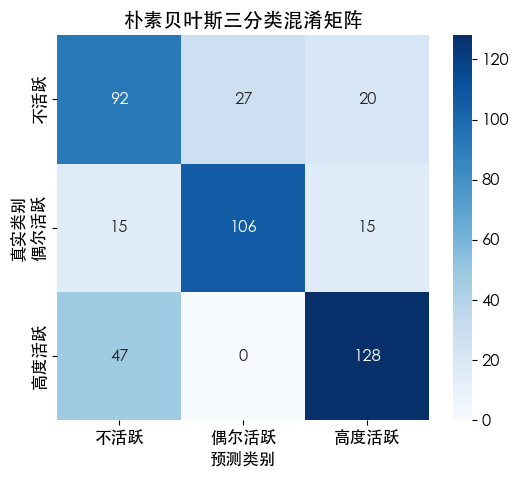

In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.size'] = 12
plt.rcParams['font.sans-serif'] = ['STHeiti']
plt.rcParams['axes.unicode_minus'] = False

# 1. 生成三分类数据集
X, y = make_classification(
    n_samples=1500, n_features=3, n_informative=3, n_redundant=0,
    n_classes=3, n_clusters_per_class=1, random_state=42
)

# 2. 使用 np.column_stack 构造特征矩阵
features = ['年龄', '收入', '浏览时间']
X = np.column_stack((X[:, 0], X[:, 1], X[:, 2]))

# 3. 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. 特征标准化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5. 训练朴素贝叶斯模型（GaussianNB）
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_nb_pred = nb_model.predict(X_test)
y_nb_prob = nb_model.predict_proba(X_test)
nb_accuracy = accuracy_score(y_test, y_nb_pred)

# 6. 训练逻辑回归模型（Softmax，三分类）
lr_model = LogisticRegression(
    penalty='l2', C=1.0, solver='lbfgs', random_state=42
)
lr_model.fit(X_train, y_train)
y_lr_pred = lr_model.predict(X_test)
y_lr_prob = lr_model.predict_proba(X_test)
lr_accuracy = accuracy_score(y_test, y_lr_pred)

# 7. 检查概率总和
nb_prob_sum = np.sum(y_nb_prob, axis=1)[:5]
lr_prob_sum = np.sum(y_lr_prob, axis=1)[:5]

# 8. 输出结果
print("朴素贝叶斯准确率:", nb_accuracy)
print("逻辑回归准确率:", lr_accuracy)
print("\n朴素贝叶斯概率总和（前 5 个样本）:", nb_prob_sum)
print("逻辑回归概率总和（前 5 个样本）:", lr_prob_sum)

# 9. 显示朴素贝叶斯概率（前 5 个样本）
prob_df_nb = pd.DataFrame(
    y_nb_prob[:5], columns=['不活跃概率', '偶尔活跃概率', '高度活跃概率']
)
print("\n朴素贝叶斯前 5 个样本的概率:\n", prob_df_nb)

# 10. 可视化朴素贝叶斯混淆矩阵
conf_matrix_nb = confusion_matrix(y_test, y_nb_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(
    conf_matrix_nb, annot=True, fmt='d', cmap='Blues',
    xticklabels=['不活跃', '偶尔活跃', '高度活跃'],
    yticklabels=['不活跃', '偶尔活跃', '高度活跃']
)
plt.xlabel('预测类别')
plt.ylabel('真实类别')
plt.title('朴素贝叶斯三分类混淆矩阵')
plt.show()

In [4]:
import sklearn.datasets as sd
X, y = sd.make_classification(
    n_samples=1500,        # 样本数量，总共生成 1500 个样本
    n_features=3,          # 每个样本包含 3 个特征（列）
    n_informative=3,       # 有 3 个“有效特征”（决定类别的特征）
    n_redundant=0,         # 没有冗余特征（由 informative 特征线性组合得到）
    n_classes=3,           # 分为 3 个类别（标签为 0、1、2）
    n_clusters_per_class=1, # 每个类别只有一个簇（cluster），即样本在特征空间中更集中
    random_state=42        # 随机种子，保证生成的数据是可复现的
)

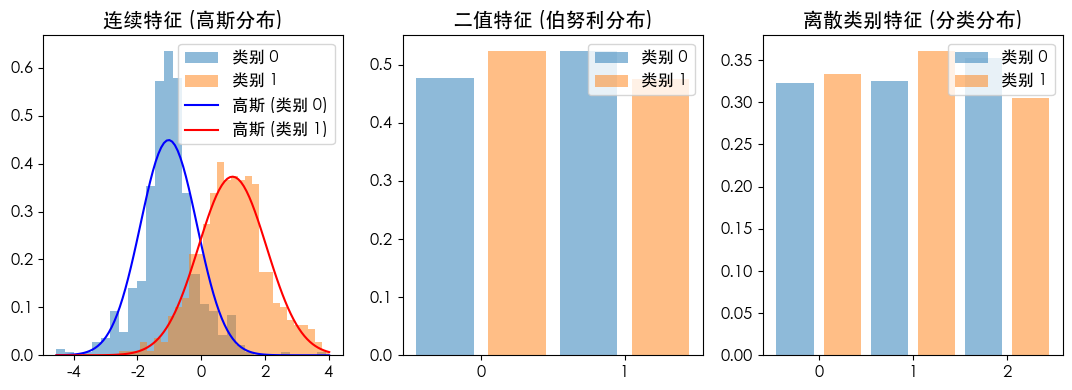

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.datasets import make_classification

# 生成示例数据，修正参数
X, y = make_classification(
    n_samples=1000,
    n_features=3,
    n_informative=2,  # 设置为 2，确保总和 <= n_features
    n_redundant=0,    # 无冗余特征
    n_repeated=0,     # 无重复特征
    n_classes=2,
    random_state=42
)
feature1 = X[:, 0]  # 连续特征（近似正态分布）
feature2 = (X[:, 1] > 0).astype(int)  # 二值特征
feature3 = np.random.choice([0, 1, 2], size=1000)  # 离散类别特征

# 创建画布
fig = plt.figure(figsize=(12, 4))

# 自由布局：手动添加子图
# 子图 1：连续特征（高斯分布）
ax1 = fig.add_axes([0.1, 0.1, 0.25, 0.8])
ax1.hist(feature1[y == 0], bins=30, alpha=0.5, label="类别 0", density=True)
ax1.hist(feature1[y == 1], bins=30, alpha=0.5, label="类别 1", density=True)
# 拟合正态分布
mu0, sigma0 = np.mean(feature1[y == 0]), np.std(feature1[y == 0])
mu1, sigma1 = np.mean(feature1[y == 1]), np.std(feature1[y == 1])
x = np.linspace(min(feature1), max(feature1), 100)
ax1.plot(x, norm.pdf(x, mu0, sigma0), 'b-', label="高斯 (类别 0)")
ax1.plot(x, norm.pdf(x, mu1, sigma1), 'r-', label="高斯 (类别 1)")
ax1.set_title("连续特征 (高斯分布)")
ax1.legend()

# 子图 2：二值特征（伯努利分布）
ax2 = fig.add_axes([0.4, 0.1, 0.25, 0.8])
counts0 = np.bincount(feature2[y == 0])
counts1 = np.bincount(feature2[y == 1])
ax2.bar([0, 1], counts0 / counts0.sum(), width=0.4, alpha=0.5, label="类别 0")
ax2.bar([0.5, 1.5], counts1 / counts1.sum(), width=0.4, alpha=0.5, label="类别 1")
ax2.set_xticks([0.25, 1.25])
ax2.set_xticklabels([0, 1])
ax2.set_title("二值特征 (伯努利分布)")
ax2.legend()

# 子图 3：离散类别特征（分类分布）
ax3 = fig.add_axes([0.7, 0.1, 0.25, 0.8])
counts0 = np.bincount(feature3[y == 0], minlength=3)
counts1 = np.bincount(feature3[y == 1], minlength=3)
ax3.bar([0, 1, 2], counts0 / counts0.sum(), width=0.4, alpha=0.5, label="类别 0")
ax3.bar([0.5, 1.5, 2.5], counts1 / counts1.sum(), width=0.4, alpha=0.5, label="类别 1")
ax3.set_xticks([0.25, 1.25, 2.25])
ax3.set_xticklabels([0, 1, 2])
ax3.set_title("离散类别特征 (分类分布)")
ax3.legend()

plt.show()